## Очистка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import statistics as st
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib

plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
pd.options.mode.chained_assignment = None


##### Загрузка данных

In [2]:
df=pd.read_csv('../dataset/car.csv', delimiter=',')
df

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,204,50920


отсутствующих данных;

нетипичных данных – выбросов;

неинформативных данных – дубликатов;

несогласованных данных – одних и тех же данных, представленных в разных регистрах или форматах.

In [3]:
# выведем размер и тип данных
print(df.shape)
print(df.dtypes)

(11914, 16)
Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object


In [4]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['Year' 'Engine HP' 'Engine Cylinders' 'Number of Doors' 'highway MPG'
 'city mpg' 'Popularity' 'MSRP']


In [5]:
 # отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['Make' 'Model' 'Engine Fuel Type' 'Transmission Type' 'Driven_Wheels'
 'Market Category' 'Vehicle Size' 'Vehicle Style']


Выделены Числовые и Категориальными признаки, так как они обрабатывются по разному.

Начнем с исследования целевой переменной - MSRP. Сначала сделал диаграмму рассеяния, чтобы увидеть, есть ли в данных выбросы.

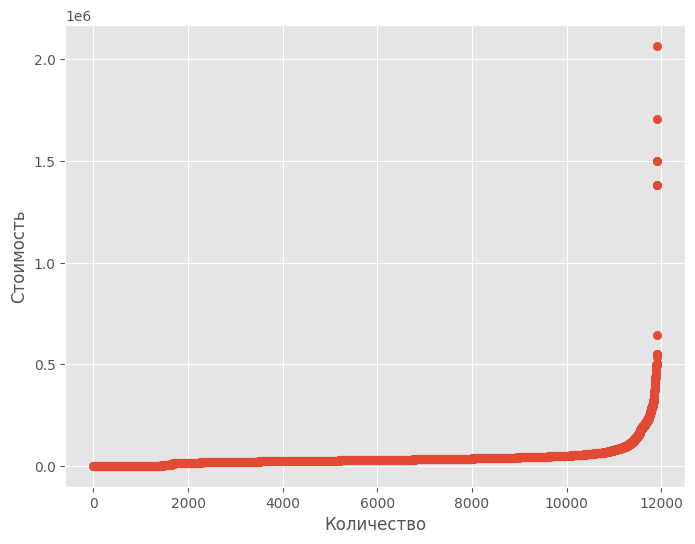

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(df.shape[0]), np.sort(df.MSRP.values))
plt.xlabel('Количество', fontsize=12)
plt.ylabel('Стоимость', fontsize=12)
plt.show()

График выглядит нормально. Так как у нас выходная переменная может принимать большие значения, потому что такие значения есть, это не ошибка

### Отсутствующие данные

Существует три типа возникновения пропусков: **MCAR, MAR, MNAR**.
**MCAR**  («совершенно  случайно  пропущенные»  –  Missing  Completely At Random) – тип возникнования пропусков, при котором вероятность про- пуска для каждого наблюдения набора одинакова. Вероятность пропуска значения для переменной X не связана ни со значением самой переменной X, ни со значениями других переменных в наборе данных.


> Например, переменная Доход подчиняется условию MCAR, если клиенты, которые не сообщают о своем доходе, имеют в среднем такой же размер дохода, что и клиенты, которые указывают свой доход.



**MAR** («случайно пропущенные» – Missing At Random) – тип возникновения пропусков, когда данные
пропущены не случайно, а ввиду некоторых закономерностей. Вероятность пропуска значения для
переменной X может быть объяснена другими имеющимися переменными, не содержащими пропуски.


> Например, переменная Доход подчиняется условию MAR, если вероятность пропуска данных в переменной Доход зависит от наблюдаемой переменной, например от переменной Образование. Например, клиенты с низким уровнем образования могут иметь большее количество пропущенных значений дохода (т. е. чаще, чем другие респонденты, не отвечают на вопрос о доходе). Необходимо проанализировать взаимосвязь между переменной Доход и переменной Образование.


**MNAR** («не случайно пропущенные» – Missing Not At Random) – тип про- пущенных данных, когда пропуск значения не является совершенно случай- ным и не может быть полностью объяснен другими переменными в наборе. Пропущенные значения остаются зависимыми от неизвестных нам факторов, необходимо провести дополнительные исследования.


> Здесь можно привести вышеописанный случай с пропусками в переменной Доход, но только теперь переменная Образование у нас отсутствует.




Отсутствие данных снижает репрезентативность выборки и, следовательно, может исказить выводы о генеральной совокупности. Работа с отсутствующими значениями – одна из самых сложных, но и самых распространенных проблем очистки. Большинство моделей не предполагают пропусков. Рассмотрим три метода обнаружения отсутствующих данных в наборе.
Для того чтобы найти отсутствие данные можно использовать функцию `describe()` библиотеки Pandas.

In [7]:
print(df.describe())

               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11884.000000     11908.000000   
mean    2010.384338    249.38607          5.628829         3.436093   
std        7.579740    109.19187          1.780559         0.881315   
min     1990.000000     55.00000          0.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg    Popularity          MSRP  
count  11914.000000  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255   1554.911197  4.059474e+04  
std        8.863001      8.987798   1441.855347  6.010910e+04  
min       12.000000      7.000000      2.000000  2.000000e+03  
25%       22.000000     16.000000    549

* В столбцах "Engine HP", "Engine Cylinders", "Number of Doors" есть пропуски данных, потому что count меньше чем размер выборки
* В столбце Engine Cylinders есть значения 0.0, что также можно считать отсутствием данных

Мы можем видеть, что есть столбцы, которые имеют минимальное значение ноль (0). В некоторых столбцах нулевое значение не имеет смысла и указывает на недопустимое или отсутствующее значение.

В различных выборках пустые значения могут быть отмечены как `NaN, 0, *, ?` и т.д.

В Python, в частности `Pandas, NumPy и Scikit-Learn`, мы отмечаем пропущенные значения как `NaN`.

Значения со значением `NaN` игнорируются в таких операциях, как `sum, count`.

Мы можем легко пометить значения как `NaN` с помощью `Pandas DataFrame`, используяфункция `replace()` на подмножестве интересующих нас столбцов.

После того, как мы отметили пропущенные значения, мы можем использовать функцию `isnull()` пометить все значения `NaN` в наборе данных как True и получить счетчик пропущенных значений для каждого столбца.

In [8]:
# заменяем данные в столбце
Cylinders= df['Engine Cylinders']

Cylinders=Cylinders.replace(0, np.NaN)

#заменяем данные во всем наборе
cols = df.columns[:14] # выбираем только входные столбцы
df_new = df.copy()
df_new = df_new[cols].replace(0, np.NaN)
df_new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16


In [9]:
print(df_new.describe())

               Year    Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11845.00000      11828.000000     11908.000000   
mean    2010.384338    249.38607          5.655479         3.436093   
std        7.579740    109.19187          1.742031         0.881315   
min     1990.000000     55.00000          3.000000         2.000000   
25%     2007.000000    170.00000          4.000000         2.000000   
50%     2015.000000    227.00000          6.000000         4.000000   
75%     2016.000000    300.00000          6.000000         4.000000   
max     2017.000000   1001.00000         16.000000         4.000000   

        highway MPG      city mpg  
count  11914.000000  11914.000000  
mean      26.637485     19.733255  
std        8.863001      8.987798  
min       12.000000      7.000000  
25%       22.000000     16.000000  
50%       26.000000     18.000000  
75%       30.000000     22.000000  
max      354.000000    137.000000  


#### Процентный список пропущенных данных

Если в наборе много признаков и визуализация занимает много времени, можно составить список долей отсутствующих записей для каждого признака.

In [10]:
# смотрим количество пропусков по каждой переменной
print(df_new.shape[0])
df_new.isnull().sum() * 100 / df_new.shape[0]


11914


Make                  0.000000
Model                 0.000000
Year                  0.000000
Engine Fuel Type      0.025180
Engine HP             0.579151
Engine Cylinders      0.721840
Transmission Type     0.000000
Driven_Wheels         0.000000
Number of Doors       0.050361
Market Category      31.408427
Vehicle Size          0.000000
Vehicle Style         0.000000
highway MPG           0.000000
city mpg              0.000000
dtype: float64

In [11]:
# или так
for col in df_new.columns:
    pct_missing = np.mean(df_new[col].isnull())
    k=round(pct_missing*100)
    print('{} - {}%'.format(col, k))

Make - 0%
Model - 0%
Year - 0%
Engine Fuel Type - 0%
Engine HP - 1%
Engine Cylinders - 1%
Transmission Type - 0%
Driven_Wheels - 0%
Number of Doors - 0%
Market Category - 31%
Vehicle Size - 0%
Vehicle Style - 0%
highway MPG - 0%
city mpg - 0%


## Метод удаления по списку

Первая техника в статистике называется методом удаления по списку и заключается в простом отбрасывании записи, содержащей пропущенные значения. Это решение подходит только в том случае, если недостающие данные не являются информативными.


In [12]:
# отбрасываем строки с большим количеством пропусков
df_new['MSRP'] = df.iloc[:,15]
df_del= df_new.dropna()
df_del
#Отбросьте столбцы, в которых отсутствует хотя бы один элемент.
#df_del= df_new.dropna(axis='columns')

#Оставьте только строки с как минимум двумя значениями, отличными от NA.
#df_del= df_new.dropna(thresh=2)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,"Crossover,Hatchback,Luxury",Midsize,4dr Hatchback,23,16,50920


Запустив этот пример, мы увидим, что количество строк было агрессивно сокращено с 11913 в исходном наборе данных до 11799, при этом все строки, содержащие NaN, были удалены.

## Отбрасывание признаков
Как и предыдущая техника, отбрасывание признаков может применяться только для неинформативных признаков.

В процентном списке, построенном ранее, мы увидели, что признак Insulin имеет высокий процент недостающих значений – 49%. Мы можем полностью отказаться от этого признака:

In [13]:
cols_to_drop = ['Market Category']
df_new = df_new.drop(cols_to_drop, axis=1)
df_new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50920


Из приведенной таблице видно, что мы удалили столбец Категория рынка, потому что в ней были собранные данные из других колонок, уникальные данные, не полные и смешанные данные.

## Внесение недостающих значений
Для численных признаков можно воспользоваться методом принудительного заполнения пропусков.
Например, на место пропуска можно записать среднее или медианное значение, полученное из остальных
записей.
В случае данных, имеющих асимметричное распределение, предпочитают
использовать медиану, а не среднее, так как на нее не влияет небольшое число наблюдений c очень
большими или очень маленькими значениями.

Для категориальных признаков можно использовать в качестве заполнителя наиболее часто встречающееся
значение.

Вновь обратите внимание, что замена средним, медианой и прочими статистиками необходимо
выполнять после разбиения набора данных на обучающую и тестовую выборки (внутри цикла перекрестной
проверки).
Помимо замены средним или медианой, пропуски можно заменить значениями-константами. Для
древовидных алгоритмов эффективной может быть замена значением вне диапазона имеющихся значений.
Если изаменять значением, которое будет больше любого имеющегося значения, то в дереве можно
будет выбрать такое разбиение по этому признаку, что все наблюдения с известными значениями пойдут
в левый узел, а все наблюдения с пропусками – в правый.

Часто применяют индикатор пропусков для соответствующей переменной. Он принимает значение 1, если
переменная имеет пропуск, или 0, если переменная не содержит пропуск. В рамках бизнес-подхода
индикатор пропусков носит временный характер. Мы строим уравнение регрессии и смотрим, является
ли коэффициент для данного индикатора значимым. Если коэффициент значим, то выбор способа
замены признака, для которого создавался индикатор, может существенно повлиять на качество
модели. Если коэффициент не является значимым, то выбор способа замены признака, для которого создавался индикатор, не повлияет существенно на качество модели. Это необходимо для
приоритизации операций замен для десятков-сотен признаков. Допустим, у нас 200 признаков с
пропусками, нужно выяснить, для каких признаков имеет смысл пробовать разные способы замены, а
каким признакам будет достаточно замены медианой или средним.



Возьмем для примера признак Pregnancies и заменим все недостающие значения медианой этого признака:

Pandas имеет функцию `fillna()` для замены пропущенных значений конкретным значением.

Например, мы можем использовать `fillna()`, чтобы заменить отсутствующие значения средним значением для каждого столбца следующим образом:

In [14]:
med = df_new['Engine Cylinders'].median()
print(med)
df_new['Engine Cylinders'] = df_new['Engine Cylinders'].fillna(med)
df_new

6.0


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50920


Одну и ту же стратегию принудительного заполнения можно применить сразу для всех числовых признаков:

In [15]:
df_numeric = df_new.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df_new[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:  # выполняет только вставку для столбцов, в которых отсутствуют значения.
        print('подстановка пропущенных значений для: {}'.format(col))
        med = df_new[col].median()
        df_new[col] = df_new[col].fillna(med)
df_new

подстановка пропущенных значений для: Engine HP
подстановка пропущенных значений для: Number of Doors


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50920


In [16]:
# смотрим количество пропусков по каждой переменной
print(df_new.shape[0])
df_new.isnull().sum() * 100 / df_new.shape[0]

11914


Make                 0.00000
Model                0.00000
Year                 0.00000
Engine Fuel Type     0.02518
Engine HP            0.00000
Engine Cylinders     0.00000
Transmission Type    0.00000
Driven_Wheels        0.00000
Number of Doors      0.00000
Vehicle Size         0.00000
Vehicle Style        0.00000
highway MPG          0.00000
city mpg             0.00000
MSRP                 0.00000
dtype: float64

## Одномерное и многомерное восстановление.

Одним из типов алгоритма восстановления является одномерный, который вменяет значения в i-м измерении признака, используя только не пропущенные значения в этом измерении признака (например, `impute.SimpleImputer`). Напротив, многомерные алгоритмы восстановления используют весь набор доступных измерений характеристик для оценки недостающих значений (например, `impute.IterativeImputer`).

## Одномерное восстановление признаков
Класс` SimpleImputer` библиотеки` scikit-learn` предоставляет основные стратегии для восстановления отсутствующих значений. Пропущенные значения могут быть восстановлены с использованием предоставленного постоянного значения или с использованием статистики (среднего, медианного или наиболее частого) каждого столбца, в котором находятся пропущенные значения. Этот класс также допускает различные кодировки пропущенных значений.

Следующий фрагмент демонстрирует, как заменить отсутствующие значения, закодированные как np.nan, с использованием среднего значения столбцов (ось 0), содержащих отсутствующие значения:


In [17]:
from sklearn.impute import SimpleImputer
# Создаём объект класса SimpleImputer с параметрами:
# - помечаем пропуски, как np.nan
# - указываем арифметическое среднее в качестве стратегии заполнения
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# Настраиваем алгоритм обучения
df1 = df_new.select_dtypes(include=[np.number])
imputer = imputer.fit(df1)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imputer.transform(df1.loc[:,:]), columns = df1.columns)

df_new1.round(2)

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,34500.0
...,...,...,...,...,...,...,...
11909,2012.0,300.0,6.0,4.0,23.0,16.0,46120.0
11910,2012.0,300.0,6.0,4.0,23.0,16.0,56670.0
11911,2012.0,300.0,6.0,4.0,23.0,16.0,50620.0
11912,2013.0,300.0,6.0,4.0,23.0,16.0,50920.0


In [18]:
df1.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.256421,5.657965,3.436377,26.637485,19.733255,4.059474e+04
std,7.579740,108.888444,1.735977,0.881184,8.863001,8.987798,6.010910e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,2.065902e+06


In [19]:
df1['Number of Doors'].unique()

array([2., 4., 3.])

В процессе настройки (обучения)` SimpleImputer` вычисляет средние значения по каждому столбцу матрицы. При трансформации вычисленные средние значения вставляются вместо пропусков.

Заполнитель, настроенный на одной матрице, можно использовать для трансформации другой матрицы с близкими значениями. Например, модель машинного обучения для диагностики некоторого заболевания обучается на данных различных анализов. Некоторые значения анализов могут быть пропущены (пациент не сдавал эти анализы). Пропущенные значения заполнены с помощью заполнителя. При обследовании пациента с помощью обученной модели вводятся результаты его анализов. Если какой то анализ отсутствует, то можно без большой погрешности заполнить его значение с помощью заполнителя.

Матрицы, на которой настраивается заполнитель, и заполняемая матрица должны иметь одинаковой число столбцов, число строк может отличаться.

Класс `SimpleImputer` также поддерживает заполнение категориальных значений, представленных в виде обычных строк или типом "`category`" в библиотеке `pandas`. В таких случаях в качестве стратегии заполнения следует выбирать "`most_frequent`" (наиболее частое) или "`constant`" (константа):


In [20]:
for column in df.columns:
    print(column,len(df[column].unique()), df[column].unique())



Make 48 ['BMW' 'Audi' 'FIAT' 'Mercedes-Benz' 'Chrysler' 'Nissan' 'Volvo' 'Mazda'
 'Mitsubishi' 'Ferrari' 'Alfa Romeo' 'Toyota' 'McLaren' 'Maybach'
 'Pontiac' 'Porsche' 'Saab' 'GMC' 'Hyundai' 'Plymouth' 'Honda'
 'Oldsmobile' 'Suzuki' 'Ford' 'Cadillac' 'Kia' 'Bentley' 'Chevrolet'
 'Dodge' 'Lamborghini' 'Lincoln' 'Subaru' 'Volkswagen' 'Spyker' 'Buick'
 'Acura' 'Rolls-Royce' 'Maserati' 'Lexus' 'Aston Martin' 'Land Rover'
 'Lotus' 'Infiniti' 'Scion' 'Genesis' 'HUMMER' 'Tesla' 'Bugatti']
Model 915 ['1 Series M' '1 Series' '100' '124 Spider' '190-Class' '2 Series' '200'
 '200SX' '240SX' '240' '2' '3 Series Gran Turismo' '3 Series' '300-Class'
 '3000GT' '300' '300M' '300ZX' '323' '350-Class' '350Z' '360' '370Z' '3'
 '4 Series Gran Coupe' '4 Series' '400-Class' '420-Class' '456M'
 '458 Italia' '4C' '4Runner' '5 Series Gran Turismo' '5 Series'
 '500-Class' '500e' '500' '500L' '500X' '550' '560-Class' '570S' '575M'
 '57' '599' '5' '6 Series Gran Coupe' '6 Series' '600-Class' '6000'
 '612 Scagliet

In [21]:
# Пример заполнения категориальных данных
from sklearn.impute import SimpleImputer
import pandas as pd
imp = SimpleImputer(strategy="most_frequent")
print()
df2 = df_new.select_dtypes(exclude=[np.number])
df_new2 = pd.DataFrame(imp.fit_transform(df2), columns = df2.columns)
df_new2.describe()

,Make,Model,Engine Fuel Type,Transmission Type,Driven_Wheels,Vehicle Size,Vehicle Style
count,11914,11914,11914,11914,11914,11914,11914
unique,48,915,10,5,4,3,16
top,Chevrolet,Silverado 1500,regular unleaded,AUTOMATIC,front wheel drive,Compact,Sedan
freq,1123,156,7175,8266,4787,4764,3048


## Многомерное восстановление признаков
Более сложный подход заключается в использовании `IterativeImputer` класса, который моделирует каждую функцию с пропущенными значениями в зависимости от других функций и использует эту оценку для восстановления. Это происходит в итеративном циклическом режиме: на каждом шаге столбец функций обозначается как выходные y, а другие столбцы функций обрабатываются как входные X. Регрессор подходит на (X, y) для известного y. Затем регрессор используется для прогнозирования недостающих значений y. Это выполняется для каждой функции итеративно, а затем повторяется для `max_iter` раундов восстановления. Возвращаются результаты последнего раунда восстановления.

**Примечание**

В данный момент алгоритм многомерного заполнения в `Scikit-learn` является экспериментальным, поэтому перед использованием `IterativeImputer` нужно делать дополнительный импорт `from sklearn.experimental import enable_iterative_imputer`,  который позволяет использовать данный алгоритм. Алгоритм тестируется и совершенствуется: результаты прогнозов и API могут измениться без каких-либо предупреждений. Поэтому необходимо следить за документацией.


In [22]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imp = IterativeImputer(max_iter=10, random_state=0)
# Настраиваем алгоритм обучения
df1 = df_new.select_dtypes(include=[np.number])
imp = imp.fit(df1)
#преобразуем матрицу к формату dataframe
df_new1 = pd.DataFrame(imp.transform(df1.loc[:,:]), columns = df1.columns)

df_new1.round(2)


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
0,2011.0,335.0,6.0,2.0,26.0,19.0,46135.0
1,2011.0,300.0,6.0,2.0,28.0,19.0,40650.0
2,2011.0,300.0,6.0,2.0,28.0,20.0,36350.0
3,2011.0,230.0,6.0,2.0,28.0,18.0,29450.0
4,2011.0,230.0,6.0,2.0,28.0,18.0,34500.0
...,...,...,...,...,...,...,...
11909,2012.0,300.0,6.0,4.0,23.0,16.0,46120.0
11910,2012.0,300.0,6.0,4.0,23.0,16.0,56670.0
11911,2012.0,300.0,6.0,4.0,23.0,16.0,50620.0
11912,2013.0,300.0,6.0,4.0,23.0,16.0,50920.0


In [23]:
df_new1.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,MSRP
count,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.256421,5.657965,3.436377,26.637485,19.733255,4.059474e+04
std,7.579740,108.888444,1.735977,0.881184,8.863001,8.987798,6.010910e+04
min,1990.000000,55.000000,3.000000,2.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.000000,16.000000,4.000000,354.000000,137.000000,2.065902e+06


## Нетипичные данные (выбросы)
Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками. Причины выбросов:


![img](https://drive.google.com/uc?id=1JsBHCwHT1ux5O-VdTMBS_FPfOAkCwpZv)

Хорошей статистикой для суммирования выборки негауссовых распределений данных является Interquartile Range, или IQR для краткости. IQR рассчитывается как разница между 75-м и 25-м процентилями данных и определяет прямоугольник на графике прямоугольника. IQR может использоваться для определения выбросов путем определения пределов значений выборки, которые являются фактором IQR ниже 25-го процентиля или выше 75-го процентиля.

#### Гистограмма/коробчатая диаграмма
Если признак численный, можно построить гистограмму или коробчатую диаграмму (ящик с усами)

<AxesSubplot: >

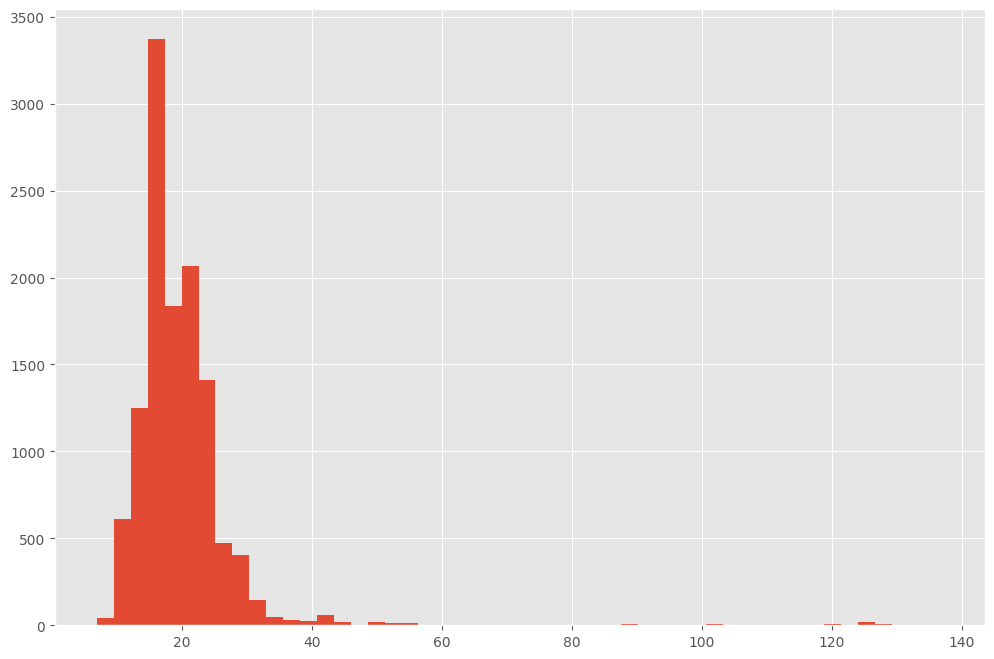

In [24]:
categ = 'city mpg'
df[categ].hist(bins=50)

Чтобы изучить особенность поближе, построим коробчатую диаграмму.

<AxesSubplot: >

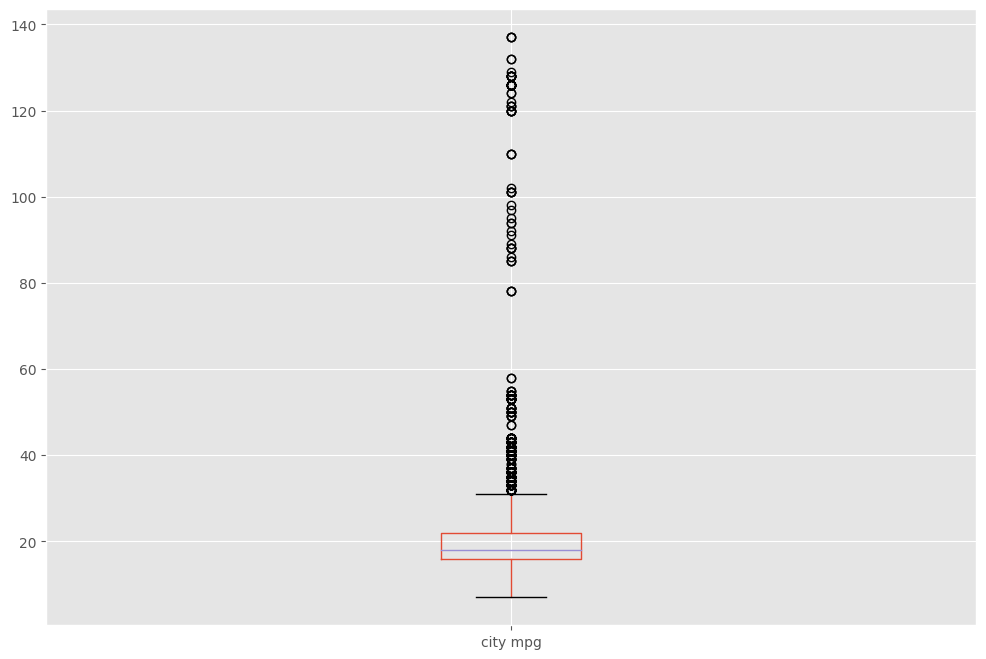

In [25]:
df.boxplot(column=[categ])

##### Видим, что есть выброс со значением около 137.

### Описательная статистика
Отклонения численных признаков могут быть слишком четкими, чтобы не визуализироваться коробчатой диаграммой. Вместо этого можно проанализировать их описательную статистику.

Например, для признака SkinThickness видно, что максимальное значение равно 99, в то время как 75% квартиль равен только 32. Значение 99 – выброс.

In [26]:
df_new[categ].describe()

count    11914.000000
mean        19.733255
std          8.987798
min          7.000000
25%         16.000000
50%         18.000000
75%         22.000000
max        137.000000
Name: city mpg, dtype: float64

Выбросы довольно просто обнаружить, но выбор способа их устранения слишком существенно зависит от
специфики набора данных и целей проекта. Их обработка во многом похожа на обработку пропущенных
данных, которую мы разбирали в предыдущем разделе. Можно удалить записи или признаки с выбросами,
либо скорректировать их, либо оставить без изменений.

In [27]:
df_new_del = df_new1.drop(np.where(df_new1[categ] >= 33)[0])

In [28]:
df_new_del[categ].describe()

count    11620.000000
mean        18.779002
std          4.579865
min          7.000000
25%         15.000000
50%         18.000000
75%         22.000000
max         32.000000
Name: city mpg, dtype: float64

<AxesSubplot: >

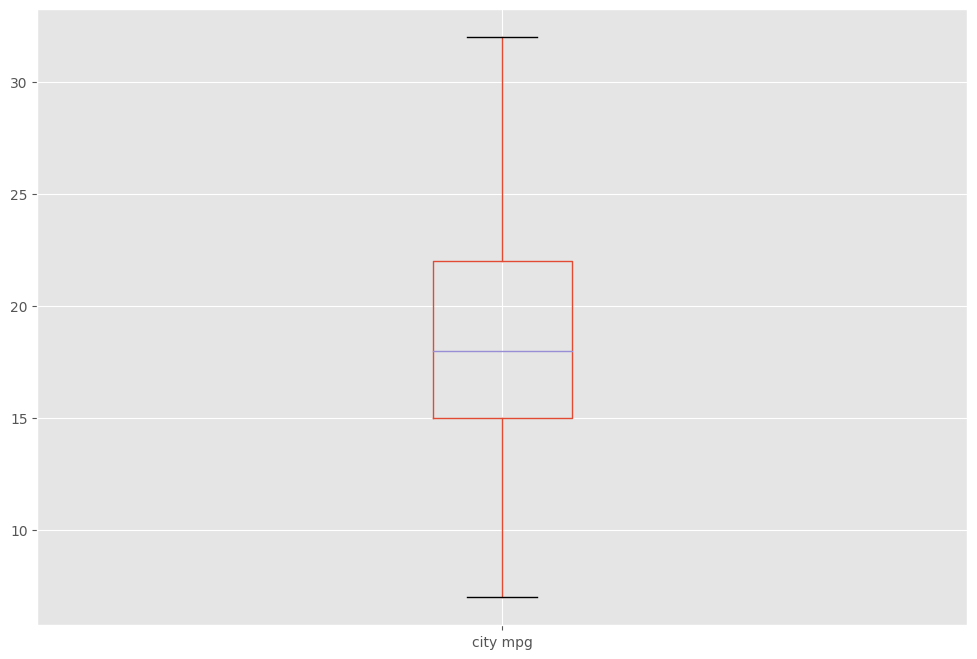

In [29]:
df_new_del.boxplot(column=[categ])

Переходим к более простой части очистки данных – **удалению мусора**.

Вся информация, поступающая в модель, должна служить целям проекта. Если она не добавляет никакой
ценности, от нее следует избавиться.

Три основных типа «ненужных» данных:
- неинформативные признаки с большим количеством одинаковых значений,
- нерелевантные признаки,
- дубликаты записей.

Рассмотрим работу с каждым типом отдельно.

## Неинформативные признаки
Если признак имеет слишком много строк с одинаковыми значениями, он не несет полезной информации
для проекта.

Составим список признаков, у которых более 95% строк содержат одно и то же значение.

In [30]:
num_rows = len(df_new.index)
low_information_cols = []

for col in df_new.columns:
    cnts = df_new[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    print(top_pct*100)

    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()



9.425885512842035
1.3093839180795703
18.213866039952997
60.198086285042805
3.8274299143864363
39.88584858150075
69.38056068490852
40.17962061440322
70.16115494376363
39.98657042135303
25.583347322477756
7.352694309216049
10.32398858485815
8.695652173913043


Как видно таких признаков нет.

## Нерелевантные признаки
Нерелевантные признаки обнаруживаются ручным отбором и оценкой значимости. 


## Дубликаты записей
Если значения признаков (всех или большинства) в двух разных записях совпадают, эти записи
называются дубликатами.


#### Как обнаружить повторяющиеся записи?
Способ обнаружения дубликатов зависит от того, что именно мы считаем дубликатами. Например, в
наборе данных есть уникальный идентификатор id . Если две записи имеют одинаковый id , мы считаем, что это одна и та же запись.
Удалим все неуникальные записи:


In [31]:
df_new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50920


In [32]:
print(df_new.describe())
df_new = df_new.drop_duplicates()
df_new = df_new.dropna()
print(df_new.describe())
df_new.to_csv(path_or_buf='../dataset/car5.csv',index=False)
# key = ['Make', 'Model','Year', 'Transmission Type']

# df_new.fillna(-999).groupby(key)['MSRP'].count().sort_values(ascending=False).head(20)

# df_dedupped2 = df_new.drop_duplicates(subset=key)

# print(df_new_del.shape)
# print(df_dedupped2.shape)
# df_dedupped2

               Year     Engine HP  Engine Cylinders  Number of Doors  \
count  11914.000000  11914.000000      11914.000000     11914.000000   
mean    2010.384338    249.256421          5.657965         3.436377   
std        7.579740    108.888444          1.735977         0.881184   
min     1990.000000     55.000000          3.000000         2.000000   
25%     2007.000000    170.000000          4.000000         2.000000   
50%     2015.000000    227.000000          6.000000         4.000000   
75%     2016.000000    300.000000          6.000000         4.000000   
max     2017.000000   1001.000000         16.000000         4.000000   

        highway MPG      city mpg          MSRP  
count  11914.000000  11914.000000  1.191400e+04  
mean      26.637485     19.733255  4.059474e+04  
std        8.863001      8.987798  6.010910e+04  
min       12.000000      7.000000  2.000000e+03  
25%       22.000000     16.000000  2.100000e+04  
50%       26.000000     18.000000  2.999500e+04  
7

In [33]:
df_new

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,26,19,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,19,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,20,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Coupe,28,18,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Compact,Convertible,28,18,34500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,46120
11910,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,56670
11911,Acura,ZDX,2012,premium unleaded (required),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50620
11912,Acura,ZDX,2013,premium unleaded (recommended),300.0,6.0,AUTOMATIC,all wheel drive,4.0,Midsize,4dr Hatchback,23,16,50920


Как видно половина строк были удалены.

## Разные регистры символов
Непоследовательное использование разных регистров в категориальных значениях является очень
распространенной ошибкой, которая может существенно повлиять на анализ данных.

In [34]:
df3 = df_new.select_dtypes(exclude=[np.number])
df3.columns.values

array(['Make', 'Model', 'Engine Fuel Type', 'Transmission Type',
       'Driven_Wheels', 'Vehicle Size', 'Vehicle Style'], dtype=object)

In [35]:
categ2 = 'Model'
df3[categ2].value_counts(dropna=False)

Silverado 1500    156
Tundra            129
F-150             126
Sierra 1500        90
Frontier           76
                 ... 
M4 GTS              1
LFA                 1
Horizon             1
GS F                1
Zephyr              1
Name: Model, Length: 915, dtype: int64

Без учета регистра:

In [36]:
# пусть все будет в нижнем регистре
for column in df3.columns:
    df3[column] = df3[column].str.lower()
df3[categ2].value_counts(dropna=False)

silverado 1500    156
tundra            129
f-150             126
sierra 1500        90
frontier           76
                 ... 
m4 gts              1
lfa                 1
horizon             1
gs f                1
zephyr              1
Name: Model, Length: 914, dtype: int64

## Разные форматы данных
Ряд данных в наборе находится не в том формате, с которым нам было бы удобно работать. Например,
даты, записанные в виде строки, следует преобразовать в формат  DateTime


In [37]:
df_new
print(df_new.dtypes)

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
MSRP                   int64
dtype: object


Так наши форматы соотвествуют показателя, приводить мы ничего не будем.

## Опечатки
Опечатки в значениях категориальных признаков приводят к таким же проблемам, как и разные регистры символов. Их можно только визуально отследить. Для этого проверим каждое текстовый показатель на уникальность.  

In [38]:
df_new['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Maybach', 'Pontiac', 'Porsche', 'Saab', 'GMC',
       'Hyundai', 'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Ford',
       'Cadillac', 'Kia', 'Bentley', 'Chevrolet', 'Dodge', 'Lamborghini',
       'Lincoln', 'Subaru', 'Volkswagen', 'Spyker', 'Buick', 'Acura',
       'Rolls-Royce', 'Maserati', 'Lexus', 'Aston Martin', 'Land Rover',
       'Lotus', 'Infiniti', 'Scion', 'Genesis', 'HUMMER', 'Tesla',
       'Bugatti'], dtype=object)

In [39]:
df_new['Transmission Type'].unique()

array(['MANUAL', 'AUTOMATIC', 'AUTOMATED_MANUAL', 'DIRECT_DRIVE',
       'UNKNOWN'], dtype=object)

### Обработка редких категорий

Часто бывает, что наши переменные содержат редкие категории. Редкие категории являются источником
шума в данных, который негативно повлияет на качество модели. Кроме того, при разбиении набора
данных на обучающую и тестовую выборки может оказаться, что данная категория отсутствует в обучающей выборке, но присутствует в тестовой выборке. Это вызовет проблемы при моделировании.

Например, логистическая регрессия, встретив в тестовых данных наблюдение с неизвестной категорией
признака, не сможет вычислить прогноз, потому что категория не будет соответствовать схеме дамми-кодирования, полученной для переменной в обучающей выборке, и таким образом не будет вычислен соответствующий регрессионный коэффициент.
Давайте импортируем необходимые библиотеки и класс и загрузим данные с редкими категориями.


Если переменная содержит 2–3 редкие категории небольшой частоты, скорее всего, такие категории случайны и часто могли быть обусловлены очевидными ошибками ввода.

Множественные редкие категории часто объединяют в одну отдельную категорию, если подтверждается гипотеза о том, что редкие категории описывают определенный паттерн.
